In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import json
import pandas as pd
import numpy as np

# Generate Random Blobs

In [4]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4)
X.shape, y.shape

((1000, 2), (1000,))

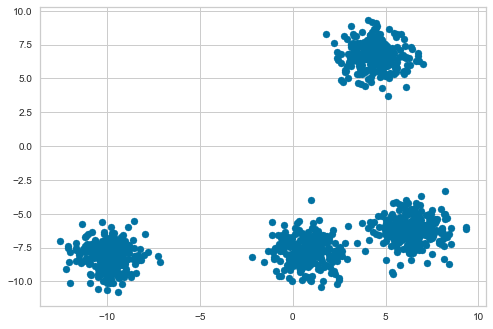

In [5]:
plt.scatter(X[:, 0], X[:, 1])

# Load gaze data

In [28]:
with open("heatmap_latest.json") as f:
    data = json.load(f)

In [29]:
X = []
for d in data:
    for i in range(d["value"]):
        cord = [d["x"], d["y"]]
        X.append(cord)
X = np.array(X)
X.shape

(1720, 2)

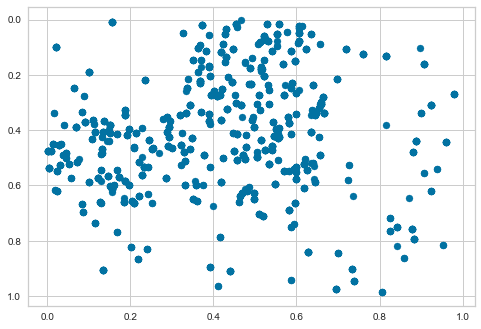

In [30]:
plt.scatter(X[:, 0], X[:, 1])
plt.gca().invert_yaxis()

# Finding the optimal number of clusters

In [31]:
random_state = 17

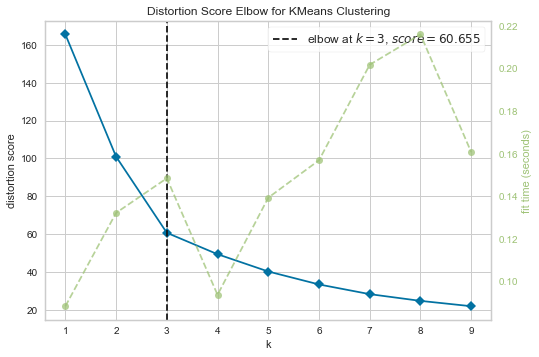

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans(random_state=random_state)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [33]:
print(visualizer.k_scores_)
visualizer.elbow_value_, visualizer.elbow_score_

[165.51363039883717, 100.90023685860403, 60.654646809058136, 49.33646297513047, 40.202009248416736, 33.35778858818575, 28.23469308246924, 24.680773349362727, 21.85881019771473]


(3, 60.654646809058136)

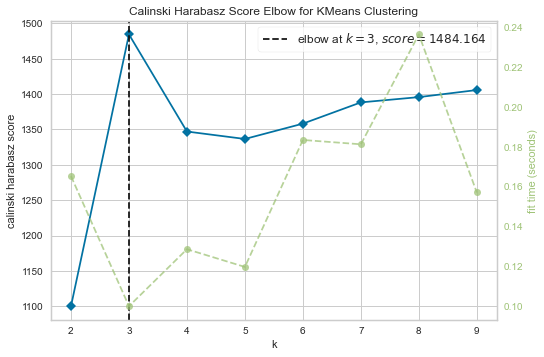

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [34]:
model = KMeans(random_state=random_state)
visualizer = KElbowVisualizer(model, metric='calinski_harabasz', k=(2,10))
visualizer.fit(X)        
visualizer.show()  

In [35]:
print(visualizer.k_scores_)
visualizer.elbow_value_, visualizer.elbow_score_

[1100.1541082374115, 1484.1639041311134, 1346.9417092153103, 1336.4346353001904, 1358.0943009134646, 1388.1198031565582, 1395.5678191613504, 1405.57397189565]


(3, 1484.1639041311134)

# Visualization

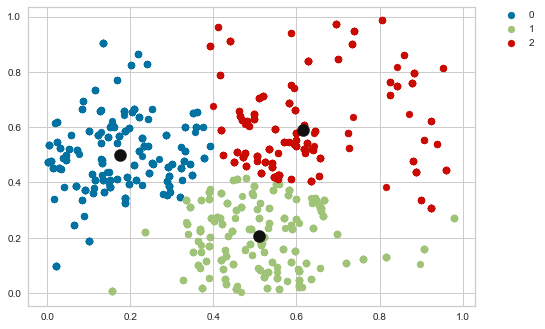

In [54]:
model = KMeans(3, random_state=17).fit(X)
labels = model.predict(X)

df = pd.DataFrame({
    "x0"    : X[:, 0],
    "x1"    : X[:, 1],
    "pred_y": labels
})
centroids = model.cluster_centers_
for cluster in range(model.n_clusters):
    plt.scatter(df[df["pred_y"] == cluster]["x0"], df[df["pred_y"] == cluster]["x1"], label = cluster)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 150, color = 'k')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [36]:
from yellowbrick.cluster import InterclusterDistance

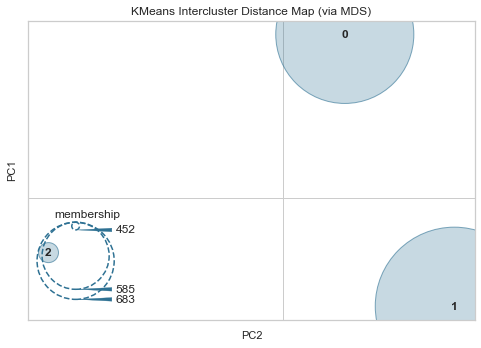

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [55]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=17)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

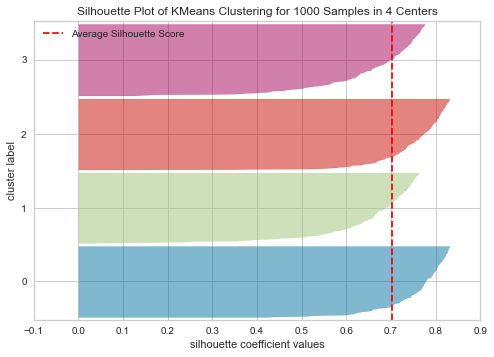

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
model = KMeans(4)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()      